## <center>  CS390FF: Special Topics in Data Sciences (Big Data Optimization) </center>

<center> KAUST </center>

<center>Lecturer: Peter Richtarik</center>

<center>TA: Filip Hanzely</center>


##  <center>Lab 2: Randomized Iterative Methods for Linear Systems</center>
<center>(C) Dominik Csiba, Filip Hanzely and Peter Richtarik </center>
<center> 12.9.2017 </center>


## 1. Introduction


Consider the problem of solving a consistent linear system:

$$Ax = b,$$

where $A\in \mathbb{R}^{m\times n}$ and $b\in \mathbb{R}^m$. Recall that the <b>basic method</b> with stepsize $\omega>0$ performs iterations of the form

$$ x_{k+1} \leftarrow x_{k} - \omega B^{-1} A^\top S_k (S_k^\top A B^{-1} A^\top S_k)^\dagger S_k^\top (Ax_k-b), $$

where 
- $B$ is a fixed $n\times n$ positive definite matrix, and
- $S_k$ is drawn in an i.i.d. fashion from a fixed distribution $\cal D$.

Recall that the method can be interpreted in several ways (e.g., stochastic gradient descent, stochastic Newton descent, stochastic fixed point method with relaxation, stochastic projection method).

### 1.1 Convergence

We shall prove in the course that, under some assumptions (assuming that $E[H]$ is positive definite is sufficient), the basic method with unit stepsize $(\omega=1)$ converges. In particular, let $x_*$ be the $B$-projection of the starting point $x_0$ onto ${\cal L} = \{x\;:\; Ax=b\}$. Then

$$ E\left[\|x_k-x_*\|_B^2\right] \leq \rho^k \|x_0-x_*\|_B^2,$$

where

$$\rho = 1 - \lambda_{\min}^+(W), \qquad W = B^{-1/2}A^\top E\left[H\right] A B^{-1/2}.$$

By $\lambda_{\min}^+(W)$ we mean the smallest nonzero eigenvalue of $W$.

In this lab, the <b>basic method</b> with unit stepsize was coded up for you. Play with the code and try to see what it does. There will be some exercices at the end. Do at least one - there will be no time to do (much) more than that in the lab. However, you are strongly encouraged to work on some of the other exercises at home.

### 1.2 Randomized Kaczmarz (RK) method

Let $e_1,e_2,\dots,e_m$ be the standard basis vectors in $\mathbb{R}^m$. That is, $e_i = (0,\dots,0,1,0,\dots,0)\in \mathbb{R}^m$, where 1 is in position $i$. If $\cal D$ is given by $S_k = e_i$ with probability $p_i>0$ for all $i=1,2,\dots,m$, and if $B$ is chosen to be equal to the identity matrix, then the basic method reduces to an algorithm that is known under the name <b>randomized Kaczmarz method</b> [1]. 

The standard randomized Kaczmarz method [1] uses the probabilities

$$p_i = \frac{\|A_{i:}^\top\|_2^2}{\sum_{j=1}^m \|A_{j:}^\top\|_2^2} = \frac{\|A_{i:}^\top\|_2^2}{\|A\|_F^2},$$

where $\|A\|_F$ denotes the <b>Frobenius norm</b> of $A$. Note that the Frobenius norm of $A$ is the standard Euclidean norm of the  vector obtained from the entries of $A$ by stacking them up into a single  vector in $\mathbb{R}^{mn}$.

Further, note that 

$$W = A^\top E\left[H\right] A $$

where for the standard RK method we have
$$\begin{eqnarray}E[H] &=& E [S (S^\top A  A^\top S)^\dagger S^\top] 
\\
&=& \sum_{i=1}^m p_i e_i (e_i^\top A  A^\top e_i)^\dagger e_i^\top\\
&=& \sum_{i=1}^m \frac{p_i}{\|A_{i:}^\top\|_2^2} e_i e_i^\top \\
&=& \frac{1}{\|A\|^2_F} \sum_{i=1}^m e_i e_i^\top \\
&=& \frac{I}{\|A\|^2_F},
\end{eqnarray}$$

where $I$ denotes the $m\times m$ identity matrix. Therefore, the convergence rate of the standard RK method is given by

$$\rho = 1 - \lambda_{\min}^+(W) = 1 - \lambda_{\min}^+\left(\frac{A^\top A}{\|A\|_F^2}\right) = 1 - \frac{\lambda_{\min}^+\left(A^\top A\right)}{\|A\|_F^2}.$$


### 1.3 Bibliography Remarks

The randomized Kaczmarz method was developed in [1]. The lectures on linear systems are largely based on [4]. You may wish to read [2] to get more insights about the basic method, beyond what we have covered in class. A duality theory was developed in [3].

[1] Thomas Strohmer and Roman Vershynin. A randomized Kaczmarz algorithm with exponential convergence, <i>Journal of Fourier Analysis and Applications,</i> 15:262, 2009.

[2] Robert Gower and Peter Richtarik. Randomized iterative methods for linear systems, <i>SIAM Journal on Matrix Analysis and Applications</i> 36(4):1660-1690,  2015.

[3] Robert Gower and Peter Richtarik. Stochastic dual ascent for solving linear systems, <i>arXiv:1512.06890</i>, 2015.

[4] Peter Richtarik and Martin Takac. Stochastic reformulations of linear systems and efficient randomized algorithms, <i>Manuscript,</i> 2016.






## 2. Generate data

We first generate an $m\times n$ matrix $A$, then a random vector $x^*$ ($\verb"x_star"$) and finally, set $b = A x^*$. This way we will know the system we have generated is consistent (i.e., that it has a solution).

## 2.1 Silly synthetic data

In [2]:
srand(1) # set random seed to 1

m = 1000
n = 50

# Generate random matrix A

A = randn(m,n) # A has random standard normal entries. For uniform entries on [0,1], use rand() 
x_star = randn(n)
b = A*x_star

1000-element Array{Float64,1}:
   0.334528
   2.18282 
   6.6722  
  10.0642  
   4.27898 
   1.46443 
   1.01054 
  -0.908806
  -8.40474 
  -3.98806 
  -5.25256 
   3.95305 
  -7.94644 
   ⋮       
   2.05124 
  -0.194267
  -6.17476 
  -3.55684 
 -10.759   
  16.0267  
   7.1659  
 -14.1444  
  -3.0117  
  -1.17877 
  -4.56065 
   5.16672 

## 2.2 Smarter synthetic data (good for randomized Kaczmarz)

We now generate a matrix $A\in \mathbb{R}^{m\times n}$ such that the randomized Kaczmarz rate 

$$\rho =1 - \frac{\lambda_{\min}^+(A^\top A)}{\|A\|_F^2} = 1 - \frac{\lambda_{\min}^+(A^\top A)}{Tr(A^\top A)}$$ 

is under control. Specifically, we shall select the eigenvalues of $A^\top A$ first, and then construct a random matrix $A\in \mathbb{R}^{m\times n}$ whose spectrum is fixed this way. The trick is to assemble $A$ via its SVD (singular value decomposition):  

$$A = U D V^\top,$$ 

where $U\in \mathbb{R}^{m\times m}$ and $V\in \mathbb{R}^{n \times n}$ are orthonormal matrices and $D\in \mathbb{R}^{m\times n}$ is diagonal (that is, $D_{ij}=0$ for $i\neq j$). Note that given the SVD, we have  

$$A^\top A = V D^\top D V^\top,$$ 

and hence the eigenvalues of $A^\top A$ are $D_{ii}^2$ for $i=1,2,\dots, \min\{m,n\}$. 

Hence, 

$$\rho = 1 - \frac{\min_i D_{ii}^2}{\sum_{i} D_{ii}^2}.$$

So, we first generate the eigenvalues $D_{ii}^2$, and then generate two random orthoginal matrices $U\in \mathbb{R}^{m\times m}$ and $V\in \mathbb{R}^{n\times n}$ by performing a QR decomposition of random matrices of appropriate sizes. After this, we simply assemble $A$ from these three components via $A = U D V^\top$.


In [3]:
m = 1000
n = 50

D = zeros(m,n)

for i=1:min(m,n)   
  D[i,i] = 10 + rand()   
end

lambda_min = minimum(diag(D'*D))
lambda_sum = sum(diag(D'*D))
rho = 1- lambda_min/lambda_sum
println("rho = ",rho)

(U,RU) = qr(randn(m,m))
(V,RV) = qr(randn(n,n))
A = U*D*V'

x_star = randn(n)
b = A*x_star


rho = 0.9818054911530927


1000-element Array{Float64,1}:
  2.59111   
 -0.556459  
 -0.17882   
  0.402689  
 -0.278817  
 -2.70223   
 -0.263991  
 -2.0643    
 -0.179974  
  1.89966   
 -2.52629   
 -3.90315   
 -1.5513    
  ⋮         
 -0.985235  
  1.56159   
  4.84442   
 -0.74797   
  1.19115   
  1.15037   
 -1.76833   
 -1.09004   
 -0.205697  
  1.6215    
 -0.286106  
 -0.00876614

## 2.3 Average consensus problem

Consider the following problem: We have $n$ nodes on an undirected graph, with node $i$ containing value $c_i\in \mathbb{R}$. We wish to develop a <b>decentralized average consensus algorithm.</b> Decentralization means that in each iteration of the algorithm, only a small number of neighboring nodes can communicate (their local information) and perform computation. By consensus we mean that we wish all nodes of the network to contain the average of the values $c_1,\dots,c_n$ at the end of the process. The process can be iterative, in which case the values computed at each nodes will only converge to the average of the $c_i$ values, not necessarily reaching this in finite time.

${\bf Fact.}$ The optimal value of the optimization problem 

$$\min_{t\in \mathbb{R}} \sum_{i=1}^n (c_i-t)^2$$

is  $t = \bar{c}:= \frac{1}{n}\sum_{i=1}^n c_i.$

Using the above fact, we observe that the optimal solution of the optimization problem

$$\min \|y-c\|_2^2 \quad \text{subject to} \quad y_1=y_2=\dots=y_n$$

is $y = \bar{c}e$, where $e\in \mathbb{R}^n$ is the vector of all ones. Under the change of variables $x = y-c$, we can equivalently write the problem in the form

$$\min \|x\|_2^2 \quad \text{subject to} \quad x_1 + c_1 = x_2 + c_2 =\dots=x_n + c_n.$$

Finally, the problem can be written in the form 

$$\min \|x\|_2^2 \quad \text{subject to} \quad Ax = b,$$

where $Ax=b$ is the linear system whose $i$th equation is $x_i + c_i = x_{i+1}+c_{i+1}$ for $i=1,2,\dots,n-1$. That is, $A = [e_1-e_2; e_2-e_3; \dots ; e_{n-1} - e_n]$, where $e_i$ is the $i$th unit coordinate vector, and $b = [c_2-c_1; c_3-c_2; \dots; c_n-c_{n-1}]$. 

We can now directly apply the basic method (with unit stepsize) to the last problem -- as the method, when started from $x_0 = 0$, automatically finds the least-norm solution of the linear system $Ax=b$.



In [4]:
# MODEL 1

n = 10
m = 10

A = zeros(m,n)
c = 1:n
b = zeros(m)

for i=1:n-1
    A[i,i] = 1
    A[i,i+1] = -1
    b[i] = c[i+1]-c[i]
end
A[n,n] = 1
A[n,1] = -1
b[n] = c[1] - c[n]



# MODEL 2

n = 10
m = 9

A = zeros(m,n)
c = 1:n
b = zeros(m)

for i=1:n-1
    A[i,i] = 1
    A[i,i+1] = -1
    b[i] = c[i+1]-c[i]
end

# PRINT THE DATA MATRIX
#println(A[1,2])
println("A = ", A)

# PRINT THE SOLUTION

y_star = ones(n)*sum(c)/n  # averages should be
x_star =  y_star - c       # this is what the algorithm should compute

A = [1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0]


10-element Array{Float64,1}:
  4.5
  3.5
  2.5
  1.5
  0.5
 -0.5
 -1.5
 -2.5
 -3.5
 -4.5

## 3. The Generic Solver

The two functions below implement the general version of the basic method.

In [5]:
function iterate(x, A, b, Binv, S)
    
    # println(x)
    return x - Binv*A'*S*pinv(S'*A*Binv*A'*S)*S'*(A*x - b) # ' is the transpose operator, it has higher priority than *
   
    
end


function RandomLinearSolve(x, A, b, Binv, sampling, T, skip)
    
    (m,n) = size(A)
    xs = zeros(n, floor(Integer, T/skip) + 1) # will remember the iterates x here
    fv = zeros(floor(Integer, T/skip) + 1)    # will remember residuals ||Ax-b|| here
    
    tic()
    time = 0
    
    for t=0:T
        tic()
        x = iterate(x, A, b, Binv, sampling()) # notice that the last argument is a function
        time = time + toq()
        if t % skip == 0
            xs[:,round(Int,t/skip)+1] = x           # remember iterate x
            fv[round(Int,t/skip)+1] = norm(A*x-b)   # remeber residual 
            println("iteration: $(t), residual: $(fv[round(Int,t/skip+1)]) ")
        end
    end
        
    println("Time = ", time)
    return xs,fv
    
end

RandomLinearSolve (generic function with 1 method)

## 4. Sampling

We now write a function which outputs a random matrix $S$ ("sampling/sketching") which is equal to a random coordinate vector in $\mathbb{R}^m$ chosen uniformly at random.

${\bf Problem:}$ You may want to modify the $\verb"sampling()"$ function so that the probabilities are proportional to the squared norms of the rows of $A$ -- as initially proposed by Strohmer and Vershynin.

In [6]:
function sampling() # for non-uniform sampling, looks into the function "sample" in the package StatsBase
    
    S = zeros(m)
    S[rand(1:m)] = 1 # rand(range) returns a random number in the given range
    return S
    
end



sampling (generic function with 1 method)

## 5. Plotting

In [7]:
using PyPlot

function PlotResults(B, x_star, xs, fv)
    
    ax = axes()
    plt[:plot](skip*(0:length(fv)-1), fv, "-", linewidth=3.0, label=L"||Ax - b||")
    plt[:plot](skip*(0:length(fv)-1), [sqrt((xs[:,i]-x_star)'*B*(xs[:,i]-x_star)) for i=1:length(fv)] , ":", linewidth=3.0, label=L"||x - x^*||_B")
    legend(loc="upper right")
    ylabel("error", fontsize=20)
    xlabel("iterations")
    ax[:set_yscale]("log")
    plt[:show]
    
end

PlotResults (generic function with 1 method)

## 6. Solve the problem

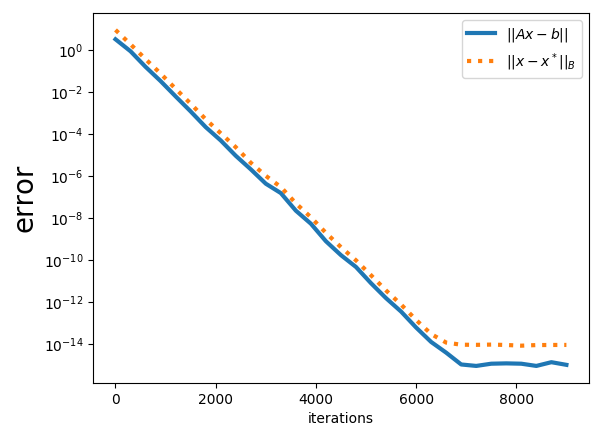

iteration: 0, residual: 3.24037034920393 
iteration: 300, residual: 0.8707812486037247 
iteration: 600, residual: 0.15776494213753914 
iteration: 900, residual: 0.033152005060007386 
iteration: 1200, residual: 0.006172194307691391 
iteration: 1500, residual: 0.001186920450074113 
iteration: 1800, residual: 0.00021253048814241142 
iteration: 2100, residual: 4.921526615137537e-5 
iteration: 2400, residual: 9.15086956750092e-6 
iteration: 2700, residual: 2.0698546409104987e-6 
iteration: 3000, residual: 4.272042949123716e-7 
iteration: 3300, residual: 1.52363700135574e-7 
iteration: 3600, residual: 2.213631057759221e-8 
iteration: 3900, residual: 5.293898850410827e-9 
iteration: 4200, residual: 7.724650029598371e-10 
iteration: 4500, residual: 1.6822565797365718e-10 
iteration: 4800, residual: 4.601858798140509e-11 
iteration: 5100, residual: 7.75129732404657e-12 
iteration: 5400, residual: 1.500853610985844e-12 
iteration: 5700, residual: 3.4565648773666267e-13 
iteration: 6000, residual

PyObject <function show at 0x7f85e840eb90>

In [8]:
x = zeros(n)  # initial iterate
#x = c

Binv = eye(n) # matrix B is one of the 2 parameters of the method

T = 1000*m       # no of iterations 
skip = round(T/30)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
xs, fv = RandomLinearSolve(x, A, b, Binv, sampling, T, skip)

# Let us now plot the results
B = inv(Binv)
PlotResults(B, x_star, xs, fv)

## 7. Extra output for the consensus problem

In [15]:
x_last = xs[:,size(xs)[2]]
println("average to be found = ", sum(c)/n)
println("vector found = ",x_last+c)
println("error = ", norm(x_last+c-ones(n)*sum(c)/n))

average to be found = 5.5
vector found = [5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5]
error = 4.440892098500626e-15


## Problem A

Code up a dedicated randomized Kaczmarz solver. That is, do it in an efficient way so that one does not need to run the $\verb"iterate"$ function. Clearly, this function is rather inefficient - this is because it is so generic.

In [9]:
using StatsBase
function Kac_sampling() # for non-uniform sampling, looks into the function "sample" in the package StatsBase
    w=zeros(size(A)[1])
    for i=1:size(A)[1]
        w[i]=norm(A[i,:]) 
    end  
    w=w./sum(w)
    return sample(Weights(w))
    
end

Kac_sampling (generic function with 1 method)

In [10]:
function RandomKaczmarzSolve(x, A, b, T, skip)
    
    (m,n) = size(A)
    xs = zeros(n, floor(Integer, T/skip) + 1) # will remember the iterates x here
    fv = zeros(floor(Integer, T/skip) + 1)    # will remember residuals ||Ax-b|| here
    
    tic()
    time = 0
    
    for t=0:T
        tic()
        coord=Kac_sampling()
        x = x - A[coord,:].*(A[coord,:]'*x - b[coord])/(A[coord,:]'*A[coord,:]) 
        time = time + toq()
        if t % skip == 0
            xs[:,round(Int,t/skip)+1] = x           # remember iterate x
            fv[round(Int,t/skip)+1] = norm(A*x-b)   # remeber residual 
            println("iteration: $(t), residual: $(fv[round(Int,t/skip+1)]) ")
        end
    end
        
    println("Time = ", time)
    return xs,fv
    
end

RandomKaczmarzSolve (generic function with 1 method)

iteration: 0, residual: 3.24037034920393 
iteration: 300, residual: 0.8930677857582938 
iteration: 600, residual: 0.15426997985911978 
iteration: 900, residual: 0.03630971576962195 
iteration: 1200, residual: 0.008003186131486338 
iteration: 1500, residual: 0.0013150223070551733 
iteration: 1800, residual: 0.00023781429243353747 
iteration: 2100, residual: 3.1097361263914594e-5 
iteration: 2400, residual: 7.161525297197683e-6 
iteration: 2700, residual: 1.0378087842701594e-6 
iteration: 3000, residual: 2.521477153745923e-7 
iteration: 3300, residual: 4.846520790348748e-8 
iteration: 3600, residual: 8.9167730940335e-9 
iteration: 3900, residual: 1.9303296113388758e-9 
iteration: 4200, residual: 4.0878488913689625e-10 
iteration: 4500, residual: 6.982309194366007e-11 
iteration: 4800, residual: 1.5843417619178734e-11 
iteration: 5100, residual: 2.2673445641481114e-12 


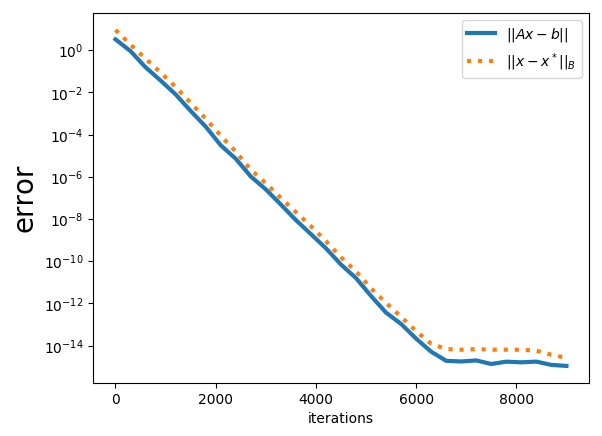

iteration: 5400, residual: 3.6428495028618437e-13 
iteration: 5700, residual: 1.0675179748641686e-13 
iteration: 6000, residual: 2.1466098300860907e-14 
iteration: 6300, residual: 5.1801155131095756e-15 
iteration: 6600, residual: 1.9100999153570945e-15 
iteration: 6900, residual: 1.7763568394002505e-15 
iteration: 7200, residual: 1.9891280697202825e-15 
iteration: 7500, residual: 1.3506446028928519e-15 
iteration: 7800, residual: 1.7377739072730912e-15 
iteration: 8100, residual: 1.6203171603697468e-15 
iteration: 8400, residual: 1.7483809675615383e-15 
iteration: 8700, residual: 1.2212453270876722e-15 
iteration: 9000, residual: 1.0934428697813141e-15 
Time = 0.7731887989999963


PyObject <function show at 0x7f85e840eb90>

In [11]:
x = zeros(n)  # initial iterate
#x = c


Binv = eye(n) # matrix B is one of the 2 parameters of the method

T = 1000*m       # no of iterations 
skip = round(T/30)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
xs, fv = RandomKaczmarzSolve(x, A, b, T, skip)

# Let us now plot the results

PlotResults(eye(n), x_star, xs, fv)

## Problem B

Assume that $A^\top A$ is positive definite. In this case, we can set $B=A^\top A$. Run the basic method with this choice of $B$, and with $S = e_i$ with probability $1/m$. How do the iterates look like? That is, how does $x_{k+1}$ differ from $x_k$?

Note that we have $A (A^{\top}A)^{-1} A^\top = I$. Clearly, 
\begin{eqnarray}
x_{k+1}-x_k&=&B^{-1} A^\top S_k (S_k^\top A B^{-1} A^\top S_k)^\dagger S_k^\top (Ax_k-b)\\
&=&(A^{\top}A)^{-1} A^\top S_k (S_k^\top A (A^{\top}A)^{-1} A^\top S_k)^\dagger S_k^\top A(x_k-x^*)
&=&(A^{\top}A)^{-1} A^\top S_k (S_k^\top A (A^{\top}A)^{-1} A^\top S_k)^\dagger S_k^\top A(x_k-x^*)
\end{eqnarray}

In [12]:
#m>=n in order to get positive definite B=A'*A
m = 12
n = 10

D = zeros(m,n)

for i=1:min(m,n)   
  D[i,i] = 10 + rand()   
end

lambda_min = minimum(diag(D'*D))
lambda_sum = sum(diag(D'*D))
rho = 1- lambda_min/lambda_sum
println("rho = ",rho)

(U,RU) = qr(randn(m,m))
(V,RV) = qr(randn(n,n))
A = U*D*V'

x_star = randn(n)
b = A*x_star


rho = 0.9093672820898635


12-element Array{Float64,1}:
  -0.922754
  13.0405  
  -7.19636 
  15.7477  
   6.57753 
  -0.667516
   4.41323 
 -10.0365  
  -7.51385 
   3.24034 
  11.0845  
   1.5194  

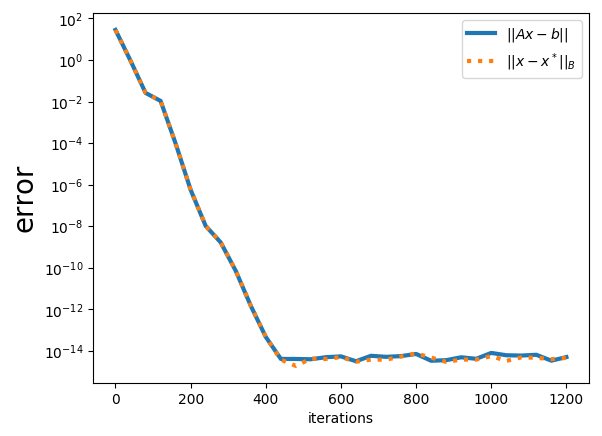

iteration: 0, residual: 27.95214296837818 
iteration: 40, residual: 0.9224428718607263 
iteration: 80, residual: 0.026109499895892823 
iteration: 120, residual: 0.010767069916472442 
iteration: 160, residual: 9.615915407718062e-5 
iteration: 200, residual: 5.673365902772475e-7 
iteration: 240, residual: 1.043089067249758e-8 
iteration: 280, residual: 1.6799129881574973e-9 
iteration: 320, residual: 7.214266207172517e-11 
iteration: 360, residual: 1.5106557918903604e-12 
iteration: 400, residual: 4.7563695869372187e-14 
iteration: 440, residual: 4.189529226675416e-15 
iteration: 480, residual: 4.165926057296536e-15 
iteration: 520, residual: 4.027524346742929e-15 
iteration: 560, residual: 5.068262347813025e-15 
iteration: 600, residual: 5.551115123125783e-15 
iteration: 640, residual: 3.2406343207394936e-15 
iteration: 680, residual: 5.912393666071813e-15 
iteration: 720, residual: 5.277940006822452e-15 
iteration: 760, residual: 5.725996103146448e-15 
iteration: 800, residual: 7.25987

PyObject <function show at 0x7f85e840eb90>

In [13]:
x = zeros(n)  # initial iterate
#x = c

Binv = inv(A'*A) # matrix B is one of the 2 parameters of the method

T = 100*m       # no of iterations 
skip = round(T/30)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
xs, fv = RandomLinearSolve(x, A, b, Binv, sampling, T, skip)

# Let us now plot the results
B = inv(Binv)
PlotResults(B, x_star, xs, fv)


## Problem C

Now define $\cal D$ as follows: 

$$S = I_{:C},$$ 

where $C$ is a random subset of $\{1,2,\dots,n\}$ of fixed cardinality $\tau$ chosen uniformly at random. Test the basic method for various choices of $\tau$. 

Find a $3\times 3$ matrix $A$ such that running the randomized Newton method with $\tau=2$ is vastly (= as much as you want) better than running it with $\tau=1$.

In [14]:
#sample τ coordinates

function τ_sampling()
    ind=[convert(Int64,x) for x in sample(1:m, τ, replace=false)]
    S=eye(m)[:,ind]
    return S
end

τ_sampling (generic function with 1 method)

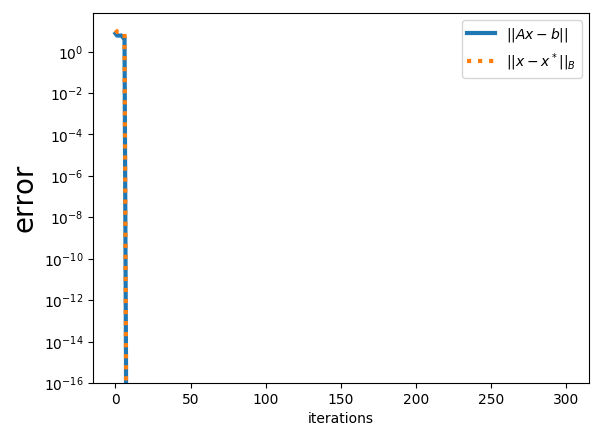

iteration: 0, residual: 7.5 
iteration: 1, residual: 6.0 
iteration: 2, residual: 6.0 
iteration: 3, residual: 6.0 
iteration: 4, residual: 6.0 
iteration: 5, residual: 4.800000000000001 
iteration: 6, residual: 4.800000000000001 
iteration: 7, residual: 6.661338147750939e-16 
iteration: 8, residual: 0.0 
iteration: 9, residual: 0.0 
iteration: 10, residual: 0.0 
iteration: 11, residual: 0.0 
iteration: 12, residual: 0.0 
iteration: 13, residual: 0.0 
iteration: 14, residual: 0.0 
iteration: 15, residual: 0.0 
iteration: 16, residual: 0.0 
iteration: 17, residual: 0.0 
iteration: 18, residual: 0.0 
iteration: 19, residual: 0.0 
iteration: 20, residual: 0.0 
iteration: 21, residual: 0.0 
iteration: 22, residual: 0.0 
iteration: 23, residual: 0.0 
iteration: 24, residual: 0.0 
iteration: 25, residual: 0.0 
iteration: 26, residual: 0.0 
iteration: 27, residual: 0.0 
iteration: 28, residual: 0.0 
iteration: 29, residual: 0.0 
iteration: 30, residual: 0.0 
iteration: 31, residual: 0.0 
iter

PyObject <function show at 0x7f85e840eb90>

In [17]:
# For the example below, one can see that A depends only on x_1 and x_2. Thus when C={1,2}, the problem is solved exactly 
# (we need on average 3 iterations to solve it). Note that when τ=1, the problem is not going to be solved exactly. 
n=3
m=3
A=[1 -0.5 0;-0.5 1 0; 0 0 0]

x_star=[0,0,0]
b=[0,0,0]
x=[5,10,0]

#choose τ=1 and τ=2 to see the difference
τ=2

#x = c

Binv = eye(n) #inv(A'*A) # matrix B is one of the 2 parameters of the method

T = 100       # no of iterations 
skip = round(1)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
xs, fv = RandomLinearSolve(x, A, b, Binv, τ_sampling, T, skip)

# Let us now plot the results
B = inv(Binv)
PlotResults(B, x_star, xs, fv)


## Problem D

Play with variants of the basic method where $S$ is a random Gaussian vector.

rho = 0.9068731055999391


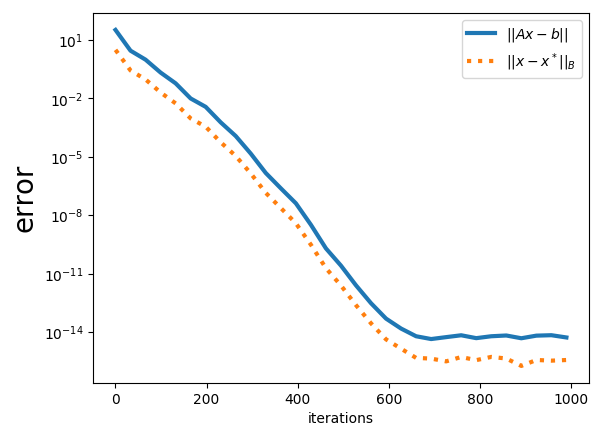

iteration: 0, residual: 33.21798673026 
iteration: 33, residual: 2.847496122526715 
iteration: 66, residual: 0.9849514733899145 
iteration: 99, residual: 0.21423779932487258 
iteration: 132, residual: 0.0599055195501058 
iteration: 165, residual: 0.010000427788025037 
iteration: 198, residual: 0.0037082558723509234 
iteration: 231, residual: 0.0005923640870121178 
iteration: 264, residual: 0.00011732346149812932 
iteration: 297, residual: 1.4680820236446223e-5 
iteration: 330, residual: 1.4766287460961432e-6 
iteration: 363, residual: 2.419301547424064e-7 
iteration: 396, residual: 4.121942510003526e-8 
iteration: 429, residual: 3.2467463028607577e-9 
iteration: 462, residual: 1.9867074780840544e-10 
iteration: 495, residual: 2.590792155411517e-11 
iteration: 528, residual: 2.512481595635462e-12 
iteration: 561, residual: 3.0316985174046715e-13 
iteration: 594, residual: 4.905125646631375e-14 
iteration: 627, residual: 1.5131651520584218e-14 
iteration: 660, residual: 6.089044468994093

PyObject <function show at 0x7f85e840eb90>

In [18]:
function gauss_sampling() 
    
    S = randn(m)
    
end

m = 10
n = 10

D = zeros(m,n)

for i=1:min(m,n)   
  D[i,i] = 10 + rand()   
end

lambda_min = minimum(diag(D'*D))
lambda_sum = sum(diag(D'*D))
rho = 1- lambda_min/lambda_sum
println("rho = ",rho)

(U,RU) = qr(randn(m,m))
(V,RV) = qr(randn(n,n))
A = U*D*V'

x_star = randn(n)
b = A*x_star

x = zeros(n)  # initial iterate
#x = c

Binv = eye(n) # matrix B is one of the 2 parameters of the method

T = 100*m       # no of iterations 
skip = round(T/30)    # we shall remember x each "skip" number of iterations

# Now we solve the problem
xs, fv = RandomLinearSolve(x, A, b, Binv, gauss_sampling, T, skip)

# Let us now plot the results
B = inv(Binv)
PlotResults(B, x_star, xs, fv)


## Problem E

Can you come up with some other interesting sketching matrix $S$ not covered in the lecture? When would you use it? 

One possibility might be to set $S$ as $i$-th column of $A$, i.e $S=A_{:i}$. Together with $B=A^\top A$, we can see that $B^{-1}A^\top S=(A^{\top}A)^{-1}A^\top Ae_i =e_i$. Thus
$$x_{k+1} \leftarrow x_{k} - \omega B^{-1} A^\top S_k (S_k^\top A B^{-1} A^\top S_k)^\dagger S_k^\top (Ax_k-b)=
 x_{k} - c e_i 
$$
for some constant $c$, which means that each iteration is only one coordinate of $x$ updated. It is possible to implement the algorithm above so that one don't need to compute $(A^\top A)^{-1}$ and every iteration we need ${\cal O}(m)$ time. Thus, this can be useful if $n$ is very large.